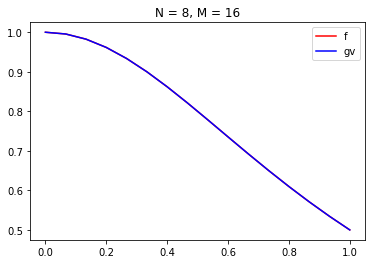

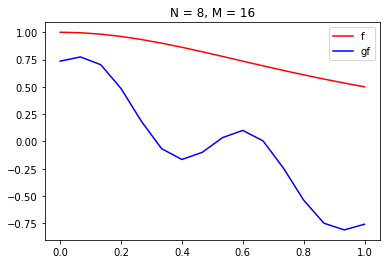

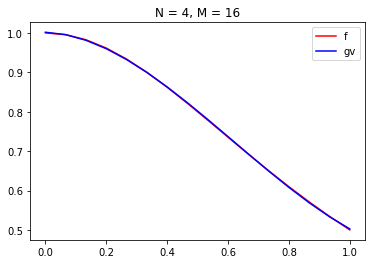

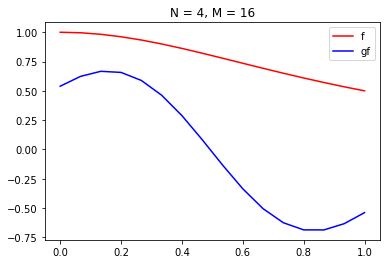

In [27]:
import numpy as np
import array as arr
import scipy as sci
import numpy.linalg as lg
import matplotlib.pyplot as plt
def f(x):
    return 1 / (1 + x ** 2)
def Fourier(x, j, n):
    if j >= 1 and j <= (n / 2):
        return np.sin(j * np.pi * x)
    elif j >= ((n / 2) + 1) and j <= n:
        return np.cos((j - n / 2) * np.pi * x)
    
M = 16
m = M - 1   
    
x = np.linspace(0, 1, M)
y1 = f(x)

N = 8
arrayX = arr.array('d') 
arrayf = arr.array('d')
for i in range (0, M): 
    arrayX.append(i / m)
for i in range (0, M):
    arrayf.append(f(arrayX[i]))
V = np.vander(arrayX, N, increasing = True)
F = np.zeros((M, N))
for i in range(0, M):
    for j in range(0, N):
        F[i, j] = Fourier(arrayX[i], j + 1, N)
q1, r1 = lg.qr(V)
c1 = np.matmul(np.matmul(lg.inv(r1), q1.T), arrayf)
#print("When N = 8, M = 16, c in Vc - f is\n", c1)
q2, r2 = lg.qr(F)
c2 = np.matmul(np.matmul(lg.inv(r2), q2.T), arrayf)
#print("When N = 8, M = 16, c in Fc - f is\n", c2)

def gv1(x, n):
    N = int(n)
    sum = 0
    for j in range(0, N):
        sum += c1[j] * (x ** j)
    return sum
def gf1(x, n):
    N = int(n)
    sum = 0
    for j in range(1, N // 2 + 1):
        sum += c2[j] * np.sin(j * np.pi * x)
    for j in range(N // 2 + 1, N):
        sum += c2[j] * np.cos((j - N / 2) * np.pi * x)
    return sum

plt.figure(1)
plt.title("N = 8, M = 16")
plt.plot(x, y1, 'r',label = "f")
plt.plot(x, gv1(x, N),'b',label = "gv")
plt.legend()

plt.figure(2)
plt.title("N = 8, M = 16")
plt.plot(x, y1, 'r',label = "f")
plt.plot(x, gf1(x, N),'b',label = "gf")
plt.legend()




N = 4
arrayX = arr.array('d') 
arrayf = arr.array('d')
for i in range (0, M): 
    arrayX.append(i / m)
for i in range (0, M):
    arrayf.append(f(arrayX[i]))
V = np.vander(arrayX, N, increasing = True)
F = np.zeros((M, N))
for i in range(0, M):
    for j in range(0, N):
        F[i, j] = Fourier(arrayX[i], j + 1, N)
q1, r1 = lg.qr(V)
c1 = np.matmul(np.matmul(lg.inv(r1), q1.T), arrayf)
#print("When N = 8, M = 16, c in Vc - f is\n", c1)
q2, r2 = lg.qr(F)
c2 = np.matmul(np.matmul(lg.inv(r2), q2.T), arrayf)
#print("When N = 8, M = 16, c in Fc - f is\n", c2)

def gv2(x, n):
    N = int(n)
    sum = 0
    for j in range(0, N):
        sum += c1[j] * (x ** j)
    return sum
def gf2(x, n):
    N = int(n)
    sum = 0
    for j in range(1, N // 2 + 1):
        sum += c2[j] * np.sin(j * np.pi * x)
    for j in range(N // 2 + 1, N):
        sum += c2[j] * np.cos((j - N / 2) * np.pi * x)
    return sum
plt.figure(3)
plt.title("N = 4, M = 16")
plt.plot(x, y1, 'r',label = "f")
plt.plot(x, gv2(x, N),'b',label = "gv")
plt.legend()

plt.figure(4)
plt.title("N = 4, M = 16")
plt.plot(x, y1, 'r',label = "f")
plt.plot(x, gf2(x, N),'b',label = "gf")
plt.legend()
